# Reproducing EnKF parameter estimation results from Schneider et al. 2017

**Notation: Follow Yvonne's thesis**
- $X, Y$: Lorenz variables
- $x$: Model state
- $y$: observations
- $R$: Observation error covariance matrix 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm_notebook as tqdm
from L96 import *
from copy import copy, deepcopy
import pdb
import multiprocessing as mp

In [3]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [4]:
def multi_helper(l, nt):
    l.iterate(nt)
    return l

## State estimation with one level model

This is basic data assimilation.

In [4]:
# Create initial conditions
l96 = L96OneLevel(dt=0.01)
l96.iterate(100)
init = l96.X.copy()

In [5]:
%%output holomap='scrubber'
ds = hv.Dataset(l96.history.sel(time=np.arange(0, 5, 0.05), method='nearest'))
ds.to(hv.Curve, ['x'])

:HoloMap   [time]
   :Curve   [x]   (X)

## Basic state estimation with the Kalman filter and the one level model

In [160]:
def multi_helper(l, nt):
    l.iterate(nt)
    return l

class EnKF():
    def __init__(self, l96, nens, obs_noise, cyc_len, mp=None):
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(l96.state.shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        
    def initialize(self, ic, ic_noise):
        # Initial conditions
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_tru = deepcopy(self.l96); self.l96_tru.set_state(self.x_t)
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
            self.l96_tru.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        self.x_f = self.l96_det.state
        self.x_f_ens = np.array([l.state for l in self.l96_ens])
        self.y = self.l96_tru.state + np.random.normal(
            0, self.obs_noise, self.l96_tru.state.shape)
        self.y_ens = np.array([self.y + np.random.normal(
            0, self.obs_noise, self.y.shape) for i in range(self.nens)])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.x_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (self.y_ens[i] - self.x_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.set_state(self.x_a)
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
    
    def kalman_gain(self, x_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = X
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_tru, self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_tru, self.l96_det, self.l96_ens = all_ls[0], all_ls[1], all_ls[2:]
            

In [207]:
enkf = EnKF(L96OneLevel(noprog=True), 100, 1, 1, mp=10)

In [208]:
enkf.initialize(init, 1)

In [209]:
enkf.iterate(10)

In [210]:
def plot_mse(enkf):
    for l in enkf.l96_ens:
        mse = (enkf.l96_tru.history - l.history)**2
        mse = mse.mean('x')
        mse.plot(c='gray')
    mse = (enkf.l96_tru.history - enkf.l96_det.history)**2
    mse = mse.mean('x')
    mse.plot(c='r')

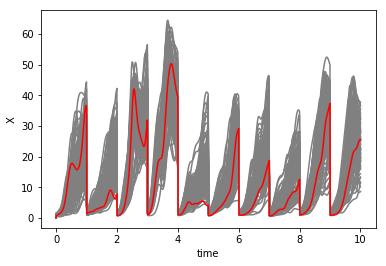

In [211]:
plot_mse(enkf)

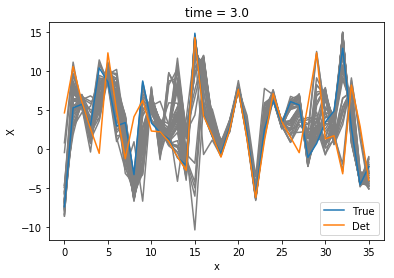

In [183]:
t = 3
for l in enkf.l96_ens:
    l.history.sel(time=t).plot(c='gray')
enkf.l96_tru.history.sel(time=t).plot(label='True')
enkf.l96_det.history.sel(time=t).plot(label='Det')
plt.legend();

In [101]:
%%output holomap='scrubber'
ds = hv.Dataset(enkf.l96_tru.history.sel(time=np.arange(0, 5, 0.05), method='nearest'))
ds2 = hv.Dataset(enkf.l96_det.history.sel(time=np.arange(0, 5, 0.05), method='nearest'))

(ds.to(hv.Curve, ['x']) * (ds2.to(hv.Curve, ['x'])))

:HoloMap   [time]
   :Overlay
      .Curve.I  :Curve   [x]   (X)
      .Curve.II :Curve   [x]   (X)

## State estimation in the two level model, only X observed

In [5]:
# Create initial conditions
l96 = L96TwoLevelUncoupled()
l96.iterate(100)
init2 = l96.state

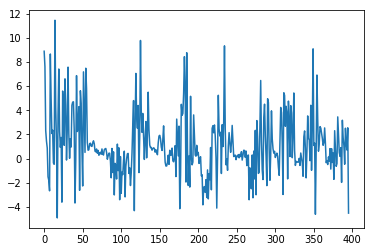

In [6]:
plt.plot(l96.state)

In [7]:
enkf2 = EnKF(L96TwoLevelUncoupled(noprog=True, dt=0.01), 100, 1, 1, mp=10)

In [8]:
enkf2.initialize(init2, 0.2)

In [9]:
enkf2.iterate(20)

In [13]:
def H(l):
    return l.X

In [33]:
class EnKF():
    def __init__(self, l96, nens, obs_noise, cyc_len, 
                 H=lambda l: l.state, mp=None):
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(H(l96).shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        self.H = H
        
    def initialize(self, ic, ic_noise):
        # Initial conditions
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_tru = deepcopy(self.l96); self.l96_tru.set_state(self.x_t)
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
            self.l96_tru.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        self.x_f = self.l96_det.state
        self.x_f_ens = np.array([l.state for l in self.l96_ens])
        self.hx_f = self.H(self.l96_det)
        self.hx_f_ens = np.array([self.H(l) for l in self.l96_ens])
        self.y = self.H(self.l96_tru) + np.random.normal(
            0, self.obs_noise, self.H(self.l96_tru).shape)
        self.y_ens = np.array([self.y + np.random.normal(
            0, self.obs_noise, self.y.shape) for i in range(self.nens)])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens, self.hx_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.hx_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (self.y_ens[i] - self.hx_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.set_state(self.x_a)
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
    
    def kalman_gain(self, x_f_ens, hx_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = (hx_f_ens - hx_f_ens.mean(0)).T
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_tru, self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_tru, self.l96_det, self.l96_ens = all_ls[0], all_ls[1], all_ls[2:]

In [39]:
enkf2 = EnKF(L96TwoLevelUncoupled(noprog=True, dt=0.01), 100, 1, 1, H=H, mp=10)

In [40]:
enkf2.initialize(init2, 0.2)

In [44]:
enkf2.iterate(10)

In [42]:
def plot_mse2(enkf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    mse = (enkf.l96_tru.history - enkf.l96_det.history)**2
    mseX = mse.mean('x')
    mseX.X.plot(ax=axs[0])
    mseY = mse.mean('y')
    mseY.Y.plot(ax=axs[1])

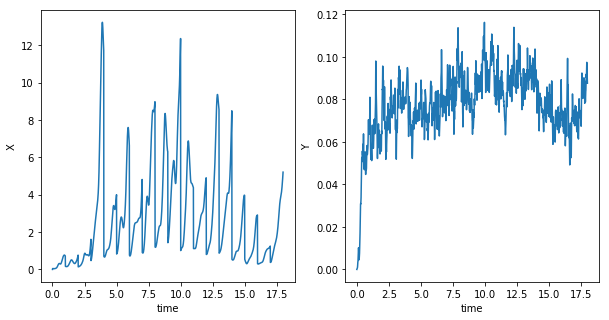

In [45]:
plot_mse2(enkf2)

## Joint state and parameter estimation in the one level model

In [62]:
# Create initial conditions
l96 = L96OneLevel(dt=0.01)
l96.iterate(100)
init = l96.X.copy()

In [112]:
def param_state(l):
    return np.concatenate([l.state, np.atleast_1d(l.F)])

In [55]:
l96 = L96OneLevel(dt=0.01)

In [56]:
state(l96)

array([ 0.77722562,  0.02894064,  0.82446177,  0.74578896,  0.52728119,
        0.88044661,  0.68829511,  0.47218761,  0.81630667,  0.16596531,
        0.70583919,  0.91121447,  0.3445073 ,  0.76359611,  0.94066712,
        0.52047251,  0.81600411,  0.73786621,  0.58168006,  0.08021773,
        0.84877086,  0.48421787,  0.08156598,  0.40510456,  0.9789139 ,
        0.84718834,  0.82741673,  0.12016795,  0.16638384,  0.4467723 ,
        0.71874087,  0.31478851,  0.18035599,  0.89427711,  0.8226005 ,
        0.02553773, 10.        ])

In [230]:
class EnKFParam():
    def __init__(self, l96, nens, obs_noise, cyc_len, 
                 H=lambda l: l.state, state=lambda l: l.state, mp=None,
                 par_noise=0):
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(H(l96).shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        self.H, self.state, self.par_noise = H, state, par_noise
        
    def initialize(self, ic, ic_noise, F_prior=15, F_sigma=5):
        # Initial conditions
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_tru = deepcopy(self.l96); self.l96_tru.set_state(self.x_t)
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_det.F = F_prior
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
            l.F = F_prior + np.random.normal(0, F_sigma)
        self.F_det = [self.l96_det.F]
        self.F_ens = [[l.F for l in self.l96_ens]]
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
            self.l96_tru.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        #pdb.set_trace()
        self.x_f = self.state(self.l96_det)
        self.x_f_ens = np.array([self.state(l) for l in self.l96_ens])
        self.hx_f = self.H(self.l96_det)
        self.hx_f_ens = np.array([self.H(l) for l in self.l96_ens])
        self.y = self.H(self.l96_tru) + np.random.normal(
            0, self.obs_noise, self.H(self.l96_tru).shape)
        self.y_ens = np.array([self.y + np.random.normal(
            0, self.obs_noise, self.y.shape) for i in range(self.nens)])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens, self.hx_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.hx_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (self.y_ens[i] - self.hx_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.set_state(self.x_a[:self.l96_det.K])
        self.l96_det.F = self.x_a[-1]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i][:self.l96_det.K])
            l.F = self.x_a_ens[i][-1] + np.random.normal(0, self.par_noise)
        # Update parameter history
        self.F_det.append(self.l96_det.F)
        self.F_ens.append([l.F for l in self.l96_ens])
    
    def kalman_gain(self, x_f_ens, hx_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = (hx_f_ens - hx_f_ens.mean(0)).T
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_tru, self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_tru, self.l96_det, self.l96_ens = all_ls[0], all_ls[1], all_ls[2:]

In [231]:
enkf = EnKFParam(L96OneLevel(noprog=True), 100, 1, 1, mp=10, state=param_state,
                 par_noise=0.1)

In [232]:
enkf.initialize(init, 1)

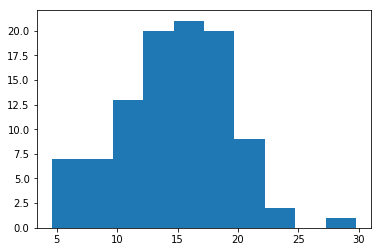

In [233]:
plt.hist(enkf.F_ens);

In [234]:
enkf.iterate(20)

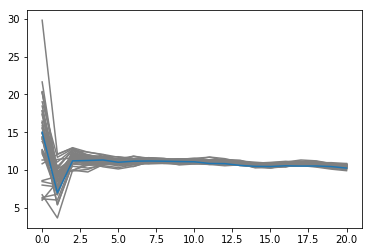

In [235]:
F_ens_hist = np.array(enkf.F_ens)
for i in range(40):
    plt.plot(F_ens_hist[:, i], c='gray')
plt.plot(enkf.F_det)

In [236]:
np.mean(F_ens_hist, 1)

array([14.80792658,  8.70108101, 11.54444222, 11.21612849, 11.29289753,
       11.04816992, 11.15332148, 11.22858135, 11.25819492, 11.15534089,
       11.14494651, 11.07760219, 11.08552574, 10.86518553, 10.65389654,
       10.60750595, 10.70787377, 10.7881441 , 10.75684365, 10.54270995,
       10.46957779])

In [237]:
np.std(F_ens_hist, 1)

array([4.51820203, 1.89947434, 0.78096511, 0.5773863 , 0.42683729,
       0.33337686, 0.29466603, 0.22109263, 0.20092791, 0.21475442,
       0.19839655, 0.20143407, 0.18180124, 0.20093367, 0.17590668,
       0.17779778, 0.17056686, 0.1737821 , 0.1798169 , 0.18544104,
       0.20739778])

In [238]:
def plot_mse(enkf):
    for l in enkf.l96_ens:
        mse = (enkf.l96_tru.history - l.history)**2
        mse = mse.mean('x')
        mse.plot(c='gray')
    mse = (enkf.l96_tru.history - enkf.l96_det.history)**2
    mse = mse.mean('x')
    mse.plot(c='r')

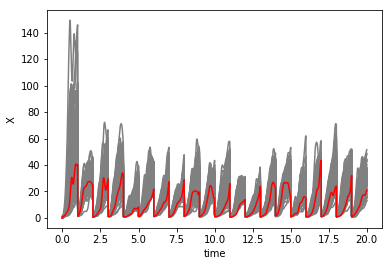

In [239]:
plot_mse(enkf)

## Joint estimation of the two level model

In [5]:
# Create initial conditions
l96 = L96TwoLevelUncoupled()
l96.iterate(100)
init2 = l96.state
init2X = l96.X
init2Y = l96.Y

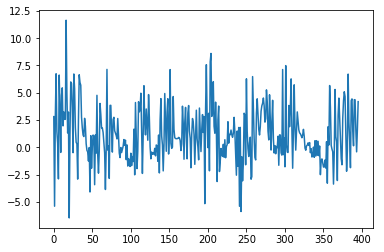

In [6]:
plt.plot(l96.state)

In [7]:
def param_state(l):
    return np.concatenate([l.X, np.array([l.F, l.h, l.c, l.b])])

In [8]:
def H(l):
    return l.X

In [9]:
param_state(l96)

array([ 2.80414082, -5.3990858 ,  2.89751056,  6.72886001,  1.44890505,
        0.38424353, -2.89537155,  6.61212242,  3.61751478, -0.47268416,
        4.76618248,  5.43993899,  1.95725072,  3.23249701,  2.58917912,
        2.55272816, 11.63001937,  4.94859023,  1.30560539,  3.22909108,
       -6.46922267,  1.15334845,  5.98212691,  5.83672466,  3.60310501,
       -0.49840839,  6.71020821,  5.37152678,  1.80006266,  0.4523359 ,
        0.31868966, -2.91498647,  2.4978783 ,  6.63842756,  5.92661393,
        5.68447975, 10.        ,  1.        , 10.        , 10.        ])

In [10]:
np.exp(2)

7.38905609893065

7.447752646487585

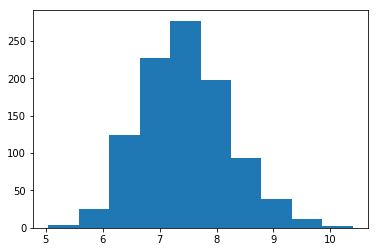

In [11]:
tmp = [np.exp(2 + np.random.normal(0, 0.1)) for i in range(1000)]
plt.hist(tmp)
np.mean(tmp)

In [17]:
class EnKFParam():
    def __init__(self, l96, nens, obs_noise, cyc_len, 
                 H=lambda l: l.state, state=lambda l: l.state, mp=None,
                 par_noise=0):
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(H(l96).shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        self.H, self.state, self.par_noise = H, state, par_noise
        
    def initialize(self, ic, ic_noise, priors=(10, 0, 2, 5), sigmas=(10, 1, 0.1, 10)):
        # Initial conditions
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_tru = deepcopy(self.l96); self.l96_tru.set_state(self.x_t)
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_det.F = priors[0]
        self.l96_det.h = priors[1]
        self.l96_det.c = np.exp(priors[2])
        self.l96_det.b = priors[3]
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
            l.F = priors[0] + np.random.normal(0, sigmas[0])
            l.h = priors[1] + np.random.normal(0, sigmas[1])
            l.c = np.exp(priors[2] + np.random.normal(0, sigmas[2]))
            l.b = priors[3] + np.random.normal(0, sigmas[3])
        self.F_det = [self.l96_det.F]; self.F_ens = [[l.F for l in self.l96_ens]]
        self.h_det = [self.l96_det.h]; self.h_ens = [[l.h for l in self.l96_ens]]
        self.c_det = [self.l96_det.c]; self.c_ens = [[l.c for l in self.l96_ens]]
        self.b_det = [self.l96_det.b]; self.b_ens = [[l.b for l in self.l96_ens]]
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
            self.l96_tru.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        #pdb.set_trace()
        self.x_f = self.state(self.l96_det)
        self.x_f_ens = np.array([self.state(l) for l in self.l96_ens])
        self.hx_f = self.H(self.l96_det)
        self.hx_f_ens = np.array([self.H(l) for l in self.l96_ens])
        self.y = self.H(self.l96_tru) + np.random.normal(
            0, self.obs_noise, self.H(self.l96_tru).shape)
        self.y_ens = np.array([self.y + np.random.normal(
            0, self.obs_noise, self.y.shape) for i in range(self.nens)])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens, self.hx_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.hx_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (self.y_ens[i] - self.hx_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.X = self.x_a[:self.l96_det.K]
        self.l96_det.F = self.x_a[-4]
        self.l96_det.h = self.x_a[-3]
        self.l96_det.c = self.x_a[-2]
        self.l96_det.b = self.x_a[-1]
        for i, l in enumerate(self.l96_ens):
            l.X = self.x_a_ens[i][:self.l96_det.K]
            l.F = self.x_a_ens[i][-4] + np.random.normal(0, self.par_noise)
            l.h = self.x_a_ens[i][-3] + np.random.normal(0, self.par_noise)
            l.c = self.x_a_ens[i][-2] + np.random.normal(0, self.par_noise)
            l.b = self.x_a_ens[i][-1] + np.random.normal(0, self.par_noise)
        # Update parameter history
        self.F_det.append(self.l96_det.F); self.F_ens.append([l.F for l in self.l96_ens])
        self.h_det.append(self.l96_det.h); self.h_ens.append([l.h for l in self.l96_ens])
        self.c_det.append(self.l96_det.c); self.c_ens.append([l.c for l in self.l96_ens])
        self.b_det.append(self.l96_det.b); self.b_ens.append([l.b for l in self.l96_ens])
    
    def kalman_gain(self, x_f_ens, hx_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = (hx_f_ens - hx_f_ens.mean(0)).T
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_tru, self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_tru, self.l96_det, self.l96_ens = all_ls[0], all_ls[1], all_ls[2:]

In [67]:
enkf2 = EnKFParam(L96TwoLevelUncoupled(noprog=True, dt=0.001), 100, 1, 0.5, mp=40, state=param_state,
                 par_noise=0.05)

In [68]:
enkf2.initialize(init2, 1)

In [69]:
enkf2.iterate(5)

In [70]:
def plot_mse2(enkf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for l in enkf.l96_ens:
        mse = (enkf.l96_tru.history - l.history)**2
        mseX = mse.mean('x')
        mseX.X.plot(ax=axs[0], c='gray')
        mseY = mse.mean('y')
        mseY.Y.plot(ax=axs[1], c='gray')
    mse = (enkf.l96_tru.history - enkf.l96_det.history)**2
    mseX = mse.mean('x')
    mseX.X.plot(ax=axs[0], c='r')
    mseY = mse.mean('y')
    mseY.Y.plot(ax=axs[1], c='r')

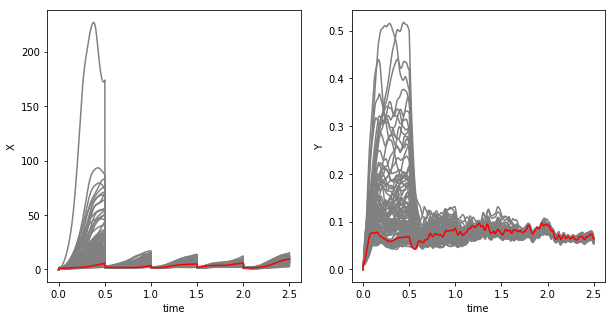

In [71]:
plot_mse2(enkf2)

In [73]:
def plot_params(enkf):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    def panel(ax, det, ens, title):
        ens = np.array(ens)
        for i in range(enkf.nens):
            ax.plot(ens[:, i], c='gray')
        ax.plot(det, c='r')
        ax.set_title(title)
    panel(axs[0], enkf.F_det, enkf.F_ens, 'F')
    panel(axs[1], enkf.h_det, enkf.h_ens, 'h')
    panel(axs[2], enkf.c_det, enkf.c_ens, 'c')
    panel(axs[3], enkf.b_det, enkf.b_ens, 'b')

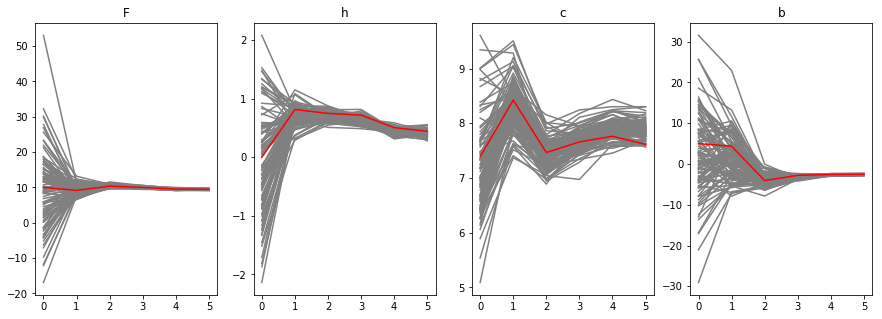

In [74]:
plot_params(enkf2)

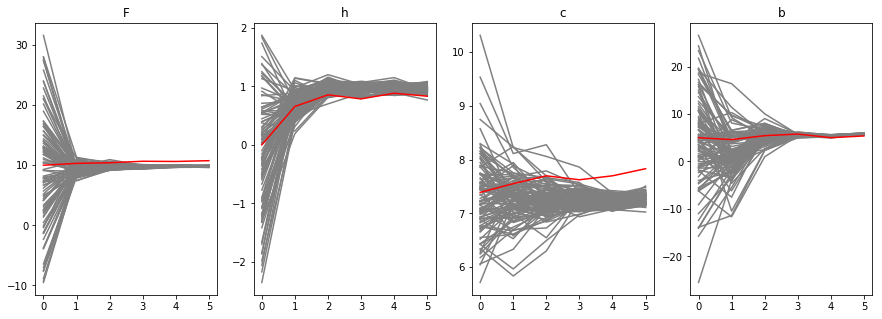

In [66]:
plot_params(enkf2)

## Parameter estimation from climate statistics in the one layer model

In [6]:
# produce a long initial run with the one level model
# Create initial conditions
l96 = L96OneLevel(dt=0.01)
l96.iterate(5_000)
init = l96.X.copy()

In [7]:
X_true = np.array(l96._history_X).mean(0); X_true

array([2.59494579, 2.57620413, 2.55080014, 2.57213213, 2.60465399,
       2.5830611 , 2.56019672, 2.55886419, 2.55947767, 2.59543473,
       2.58789322, 2.56281416, 2.59968796, 2.56634359, 2.56291656,
       2.5978001 , 2.57330623, 2.54009229, 2.62683609, 2.60415299,
       2.54548055, 2.6530701 , 2.60407398, 2.51350866, 2.62683545,
       2.663099  , 2.5797618 , 2.5802649 , 2.5955535 , 2.58637832,
       2.56850124, 2.58346658, 2.6035474 , 2.61427476, 2.50850927,
       2.55180969])

In [8]:
X2_true = (np.array(l96._history_X)**2).mean(0); X2_true

array([25.87965982, 25.65582647, 25.61079951, 25.66935501, 25.80282243,
       25.67424336, 25.82876051, 25.66669428, 25.69777165, 25.82533562,
       26.02600825, 25.64118781, 25.85815935, 25.54441348, 25.83157122,
       25.83737281, 25.44910287, 25.39638569, 26.35699657, 25.71161042,
       25.72081971, 26.11923001, 25.75436819, 25.2836204 , 26.27984921,
       26.41231525, 26.02501262, 25.95180071, 26.01904071, 25.99590328,
       25.80011195, 25.94639794, 26.24338008, 26.18484462, 25.12599388,
       25.62886128])

In [9]:
X_var = np.array(l96._history_X).var(0); X_var

array([19.14591619, 19.01899874, 19.10421815, 19.05349131, 19.01860002,
       19.00203871, 19.27415328, 19.11890831, 19.14684569, 19.08905417,
       19.32881691, 19.07317139, 19.09978188, 18.95829405, 19.26302994,
       19.08880746, 18.82719793, 18.94431683, 19.45672873, 18.92999761,
       19.2413485 , 19.08044906, 18.97316687, 18.96589462, 19.37958471,
       19.32021897, 19.36984169, 19.29403378, 19.28214275, 19.30655048,
       19.20291334, 19.27209836, 19.46492101, 19.3504121 , 18.83337514,
       19.11712859])

In [10]:
X2_var = (np.array(l96._history_X)**2).var(0); X2_var

array([1173.10400562, 1148.73512097, 1153.32843133, 1168.79486578,
       1175.27962423, 1146.25696571, 1172.11630459, 1155.20631685,
       1153.21501634, 1145.73884086, 1211.49890478, 1159.20939827,
       1174.93539581, 1126.32535185, 1178.0289973 , 1169.48090734,
       1146.09801011, 1140.2287998 , 1198.79334008, 1125.29283365,
       1173.41364187, 1180.71104636, 1127.27601768, 1139.12365985,
       1182.17461612, 1230.86376267, 1178.57753106, 1171.35238395,
       1169.27884108, 1199.79215022, 1165.75347013, 1171.31436374,
       1231.12093855, 1196.81160343, 1065.8703763 , 1144.66501944])

In [28]:
def H(l):
    return np.concatenate([
        np.array(l._history_X).mean(0),
        (np.array(l._history_X)**2).mean(0)
    ])

In [29]:
def param_state(l):
    return np.array([l.F])

In [59]:
class EnKFParamClimate():
    def __init__(self, l96, nens, obs_noise, cyc_len, y,
                 H=lambda l: l.state, state=lambda l: l.state, mp=None,
                 par_noise=0, ):
        self.y = y
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(H(l96).shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        self.H, self.state, self.par_noise = H, state, par_noise
        
    def initialize(self, ic, ic_noise, F_prior=15, F_sigma=5):
        # Initial conditions
        self.ic=ic
        self.ic_noise=ic_noise
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_det.F = F_prior
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
            l.F = F_prior + np.random.normal(0, F_sigma)
        self.F_det = [self.l96_det.F]
        self.F_ens = [[l.F for l in self.l96_ens]]
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        #pdb.set_trace()
        self.x_f = self.state(self.l96_det)
        self.x_f_ens = np.array([self.state(l) for l in self.l96_ens])
        self.hx_f = self.H(self.l96_det)
        self.hx_f_ens = np.array([self.H(l) for l in self.l96_ens])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens, self.hx_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.hx_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (self.y - self.hx_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.set_state(self.x_a[:self.l96_det.K])
        self.l96_det.F = self.x_a[-1]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i][:self.l96_det.K])
            l.F = self.x_a_ens[i][-1] + np.random.normal(0, self.par_noise)
        # Update parameter history
        self.F_det.append(self.l96_det.F)
        self.F_ens.append([l.F for l in self.l96_ens])
        
        # Erase history and reset ic
        self.l96_det._history_X = [] 
        self.l96_det.set_state(self.ic.copy() + np.random.normal(0, self.ic_noise, self.ic.shape))
        for l in self.l96_ens:
            l._history_X = [] 
            l.set_state(self.ic.copy() + np.random.normal(0, self.ic_noise, self.ic.shape))
    
    def kalman_gain(self, x_f_ens, hx_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = (hx_f_ens - hx_f_ens.mean(0)).T
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_det, self.l96_ens = all_ls[0], all_ls[1:]

In [60]:
r = 0.5

In [42]:
enkf = EnKFParamClimate(
    L96OneLevel(noprog=True, X_init=init), 
    y=np.concatenate([X_true, X2_true]),
    nens=100, 
    obs_noise = r**2 * np.concatenate([X_var, X2_var]), 
    cyc_len=20, 
    mp=10, 
    state=param_state,
    H=H,
    par_noise=0,
)

In [43]:
enkf.initialize(init, ic_noise=1, )

In [44]:
enkf.iterate(2)

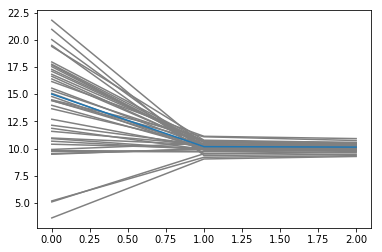

In [45]:
F_ens_hist = np.array(enkf.F_ens)
for i in range(40):
    plt.plot(F_ens_hist[:, i], c='gray')
plt.plot(enkf.F_det)

## Climate state estimation with the two level model! This is Schneider et al 2017!! 

In [6]:
# Create initial conditions
l96 = L96TwoLevelUncoupled(dt=0.001)
l96.iterate(100)
init2 = l96.state
init2X = l96.X
init2Y = l96.Y

In [7]:
# Load long run history
h = xr.open_dataset('./L96TwoLevelHistory2.nc'); h

<xarray.Dataset>
Dimensions:  (time: 100001, x: 36, y: 360)
Coordinates:
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 100.0 100.0 100.0 100.0
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
Data variables:
    X        (time, x) float64 ...
    B        (time, x) float64 ...
    Y_mean   (time, x) float64 ...
    Y2_mean  (time, x) float64 ...

In [8]:
# Compute true statistics and variances
X_true = h.X.values.mean(0)
Y_true = h.Y_mean.values.mean(0)
X2_true = (h.X.values**2).mean(0)
XY_true = (h.X * h.Y_mean).values.mean(0)
Y2_true = h.Y2_mean.values.mean(0)

X_var = h.X.values.var(0)
Y_var = h.Y_mean.values.var(0)
X2_var = (h.X.values**2).var(0)
XY_var = (h.X * h.Y_mean).values.var(0)
Y2_var = h.Y2_mean.values.var(0)

In [9]:
for a in [X_true, Y_true, X2_true, XY_true, Y2_true, X_var, Y_var, X2_var, XY_var, Y2_var]:
    print(a[0])

2.489808204903641
0.0971379813549051
18.396886401006945
0.6160610484009668
0.06147564349975336
12.197741503801415
0.015537351426442395
531.6481648582235
0.45454095127452593
0.0032463131390023468


In [80]:
for a in [X_true, Y_true, X2_true, XY_true, Y2_true, X_var, Y_var, X2_var, XY_var, Y2_var]:
    print(a[0])

2.4914771324574034
0.09802749982493464
18.60393476426921
0.6241732293521062
0.06232636733729218
12.39647646271091
0.015692380104593322
557.5380503666908
0.4817632615014799
0.00341546562946162


In [10]:
def H2(l):
    return np.concatenate([
        np.array(l._history_X).mean(0),
        np.array(l._history_Y_mean).mean(0),
        (np.array(l._history_X)**2).mean(0),
        (np.array(l._history_X)*np.array(l._history_Y_mean)).mean(0),
        np.array(l._history_Y2_mean).mean(0),
    ])

In [11]:
def param_state2(l):
    return np.array([l.F, l.h, l.c, l.b])

In [51]:
class EnKFParamClimate2():
    def __init__(self, l96, nens, obs_noise, cyc_len, y,
                 H=lambda l: l.state, state=lambda l: l.state, mp=None,
                 par_noise=0, ):
        self.y = y
        self.l96 = l96
        self.nens = nens
        self.obs_noise = obs_noise
        self.R = np.diag(np.ones(H(l96).shape) * obs_noise)
        self.cyc_len = cyc_len
        self.mp = mp
        self.H, self.state, self.par_noise = H, state, par_noise
        
    def initialize(self, ic, ic_noise, priors=(10, 0, 2, 5), sigmas=(10, 1, 0.1, 10)):
        # Initial conditions
        self.ic=ic
        self.ic_noise=ic_noise
        self.x_t = ic.copy()
        self.x_a = ic.copy() + np.random.normal(0, ic_noise, self.x_t.shape)
        self.x_a_ens = np.array([ic.copy()] * self.nens)
        self.x_a_ens += np.random.normal(0, ic_noise, self.x_a_ens.shape)
        
        # Models
        self.l96_det = deepcopy(self.l96); self.l96_det.set_state(self.x_a)
        self.l96_det.F = priors[0]
        self.l96_det.h = priors[1]
        self.l96_det.c = np.exp(priors[2])
        self.l96_det.b = priors[3]
        self.l96_ens = [deepcopy(self.l96) for n in range(self.nens)]
        for i, l in enumerate(self.l96_ens):
            l.set_state(self.x_a_ens[i])
            l.F = priors[0] + np.random.normal(0, np.sqrt(sigmas[0]))
            l.h = priors[1] + np.random.normal(0, np.sqrt(sigmas[1]))
            l.c = np.exp(priors[2] + np.random.normal(0, np.sqrt(sigmas[2])))
            l.b = priors[3] + np.random.normal(0, np.sqrt(sigmas[3]))
        self.F_det = [self.l96_det.F]; self.F_ens = [[l.F for l in self.l96_ens]]
        self.h_det = [self.l96_det.h]; self.h_ens = [[l.h for l in self.l96_ens]]
        self.c_det = [self.l96_det.c]; self.c_ens = [[l.c for l in self.l96_ens]]
        self.b_det = [self.l96_det.b]; self.b_ens = [[l.b for l in self.l96_ens]]
        
    def step(self):
        # Forecast
        if self.mp is None:
            self.l96_det.iterate(self.cyc_len)
            for l in self.l96_ens:
                l.iterate(self.cyc_len)
        else:
            self.mp_forecast()
        
        # Get arrays
        #pdb.set_trace()
        self.x_f = self.state(self.l96_det)
        self.x_f_ens = np.array([self.state(l) for l in self.l96_ens])
        self.hx_f = self.H(self.l96_det)
        self.hx_f_ens = np.array([self.H(l) for l in self.l96_ens])
        
        # New analysis
        K = self.kalman_gain(self.x_f_ens, self.hx_f_ens)
        self.x_a = self.x_f + K @ (self.y - self.hx_f)
        self.x_a_ens = np.array([
            self.x_f_ens[i] + K @ (
                (self.y + np.random.normal(0, np.sqrt(self.obs_noise), self.obs_noise.shape)) 
                - self.hx_f_ens[i]) for i in range(self.nens)
        ])
        
        # Update state in models
        self.l96_det.F = self.x_a[-4]
        self.l96_det.h = self.x_a[-3]
        self.l96_det.c = self.x_a[-2]
        self.l96_det.b = self.x_a[-1]
        for i, l in enumerate(self.l96_ens):
            l.F = self.x_a_ens[i][-4] + np.random.normal(0, self.par_noise)
            l.h = self.x_a_ens[i][-3] + np.random.normal(0, self.par_noise)
            l.c = self.x_a_ens[i][-2] + np.random.normal(0, self.par_noise)
            l.b = self.x_a_ens[i][-1] + np.random.normal(0, self.par_noise)
        # Update parameter history
        self.F_det.append(self.l96_det.F); self.F_ens.append([l.F for l in self.l96_ens])
        self.h_det.append(self.l96_det.h); self.h_ens.append([l.h for l in self.l96_ens])
        self.c_det.append(self.l96_det.c); self.c_ens.append([l.c for l in self.l96_ens])
        self.b_det.append(self.l96_det.b); self.b_ens.append([l.b for l in self.l96_ens])
        
        print('Ensemble mean F = ', self.x_a_ens[:, -4].mean())
        print('Ensemble mean h = ', self.x_a_ens[:, -3].mean())
        print('Ensemble mean c = ', self.x_a_ens[:, -2].mean())
        print('Ensemble mean b = ', self.x_a_ens[:, -1].mean())
        
        # Erase history and reset ic
        self.l96_det._history_X = [] 
        self.l96_det._history_Y_mean = [] 
        self.l96_det._history_Y2_mean = [] 
        self.l96_det.set_state(self.ic.copy() + np.random.normal(0, self.ic_noise, self.ic.shape))
        for l in self.l96_ens:
            l._history_X = [] 
            l._history_Y_mean = [] 
            l._history_Y2_mean = [] 
            l.set_state(self.ic.copy() + np.random.normal(0, self.ic_noise, self.ic.shape))
    
    def kalman_gain(self, x_f_ens, hx_f_ens):
        X = (x_f_ens - x_f_ens.mean(0)).T
        Y = (hx_f_ens - hx_f_ens.mean(0)).T
        K = X @ Y.T @ inv(Y @ Y.T + (self.nens -1) * self.R)
        return K
        
    def iterate(self, ncycles, noprog=False):
        for n in tqdm(range(ncycles), disable=noprog):
            self.step() 
            
    def mp_forecast(self):
        all_ls = [self.l96_det] + self.l96_ens
        pool = mp.Pool(processes=self.mp)
        results = [pool.apply_async(multi_helper, args=(l, self.cyc_len)) for l in all_ls]
        all_ls = [p.get() for p in results]
        pool.close()
        self.l96_det, self.l96_ens = all_ls[0], all_ls[1:]

In [52]:
r = 0.5

In [53]:
y = np.concatenate([X_true, Y_true, X2_true, XY_true, Y2_true])
var = np.concatenate([X_var, Y_var, X2_var, XY_var, Y2_var])

In [62]:
np.sqrt(var)[::36]

array([ 3.49252652,  0.12464891, 23.05749693,  0.67419652,  0.05697643])

In [58]:
enkf = EnKFParamClimate2(
    L96TwoLevelUncoupled(noprog=True, X_init=init2X, Y_init=init2Y, noYhist=True, dt=0.001), 
    y=y,
    nens=100, 
    obs_noise = r**2 * var, 
    cyc_len=100, 
    mp=40, 
    state=param_state2,
    H=H2,
    par_noise=0,
)

In [59]:
enkf.initialize(init2, ic_noise=1, )

In [60]:
enkf.iterate(10)

Ensemble mean F =  9.483276963868898
Ensemble mean h =  0.6357546194442398
Ensemble mean c =  7.949809831972495
Ensemble mean b =  5.2685759875798635
Ensemble mean F =  9.626386979547984
Ensemble mean h =  0.7227011375917877
Ensemble mean c =  7.792522847410925
Ensemble mean b =  5.577709723621008
Ensemble mean F =  9.492571668656426
Ensemble mean h =  0.9052385178701919
Ensemble mean c =  7.451469580479945
Ensemble mean b =  7.108238931680579
Ensemble mean F =  9.43470208512011
Ensemble mean h =  0.9533155569408632
Ensemble mean c =  7.637431525863763
Ensemble mean b =  8.006850830349734
Ensemble mean F =  9.446892933218457
Ensemble mean h =  0.9673485896355664
Ensemble mean c =  7.616853654773683
Ensemble mean b =  8.443472175131305
Ensemble mean F =  9.461618947044593
Ensemble mean h =  0.9689855491941363
Ensemble mean c =  7.625130780058668
Ensemble mean b =  8.584214638247083
Ensemble mean F =  9.46832280448679
Ensemble mean h =  0.9739309203141323
Ensemble mean c =  7.65345981663

In [90]:
enkf.iterate(10)

Ensemble mean F =  9.514917177789151
Ensemble mean h =  0.9819536991363589
Ensemble mean c =  7.758715961232715
Ensemble mean b =  9.179772803025216
Ensemble mean F =  9.537528223035002
Ensemble mean h =  0.9827868051209928
Ensemble mean c =  7.852052075679792
Ensemble mean b =  9.345204629684996
Ensemble mean F =  9.517270093546951
Ensemble mean h =  0.984263264120165
Ensemble mean c =  7.7941595608109795
Ensemble mean b =  9.31976509178986
Ensemble mean F =  9.504536651957785
Ensemble mean h =  0.9836586156136886
Ensemble mean c =  7.775136286348938
Ensemble mean b =  9.440962198540353
Ensemble mean F =  9.505952919671039
Ensemble mean h =  0.9856243259911375
Ensemble mean c =  7.779898805405895
Ensemble mean b =  9.585699603509555
Ensemble mean F =  9.515886414320052
Ensemble mean h =  0.9873458519827228
Ensemble mean c =  7.8143332823295
Ensemble mean b =  9.73866617286688
Ensemble mean F =  9.508311479781343
Ensemble mean h =  0.9875734509656372
Ensemble mean c =  7.81092218185167

In [66]:
def plot_params(enkf):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    def panel(ax, det, ens, title):
        ens = np.array(ens)
        print(title, ' mean = ', ens[-1].mean(), ' / std = ', ens[-1].std())
        for i in range(enkf.nens):
            ax.plot(ens[:, i], c='gray')
        ax.plot(det, c='r')
        ax.set_title(title)
    panel(axs[0], enkf.F_det, enkf.F_ens, 'F')
    panel(axs[1], enkf.h_det, enkf.h_ens, 'h')
    panel(axs[2], enkf.c_det, enkf.c_ens, 'c')
    panel(axs[3], enkf.b_det, enkf.b_ens, 'b')

In [88]:
def plot_params_schneider(enkf):
    fig, ax = plt.subplots( figsize=(8, 5))
    for ens, name, color in zip([enkf.F_ens, enkf.h_ens, enkf.c_ens, enkf.b_ens], 
                                ['F', 'h', 'c', 'b'], ['b', 'g', 'orange', 'pink']):
        ens = np.array(ens)
        ax.plot(ens.mean(1), c=color, label=name)
        ax.fill_between(
            range(ens.shape[0]), 
            np.percentile(ens, 25, 1),
            np.percentile(ens, 75, 1),
            facecolor=color,
            alpha=0.5
        )
    fig.legend()


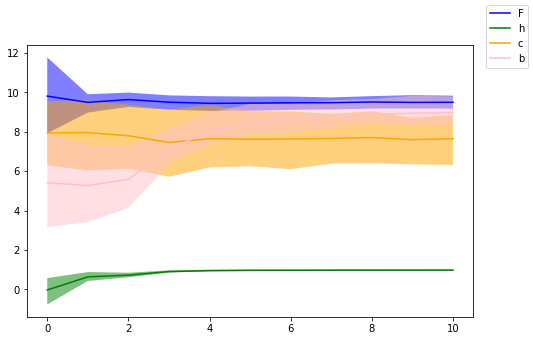

In [89]:
plot_params_schneider(enkf)

F  mean =  9.488451086233884  / std =  0.49133205679491265
h  mean =  0.9804316549741843  / std =  0.03503920732256636
c  mean =  7.642617030720224  / std =  1.8871611239711548
b  mean =  8.966677956810031  / std =  1.8589147759029498


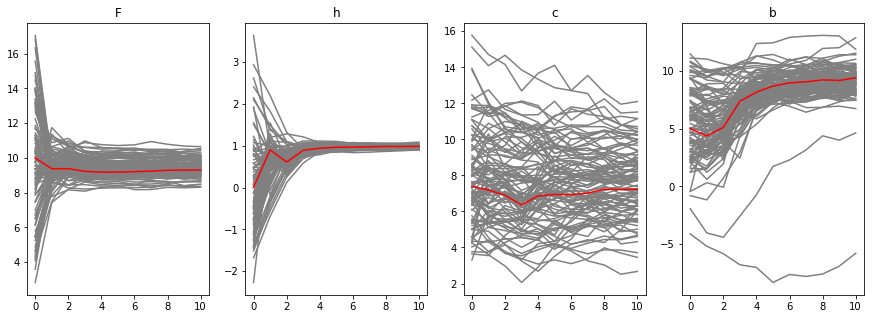

In [67]:
plot_params(enkf)

In [63]:
??plot_params

(array([ 4.,  4.,  8., 14., 21., 17., 13., 12.,  4.,  3.]),
 array([ 8.31758955,  8.55076426,  8.78393897,  9.01711369,  9.2502884 ,
         9.48346312,  9.71663783,  9.94981255, 10.18298726, 10.41616197,
        10.64933669]),
 <a list of 10 Patch objects>)

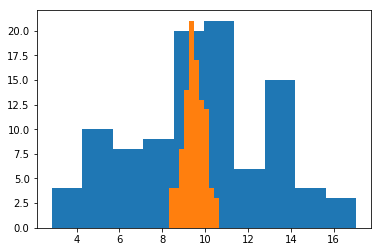

In [70]:
plt.hist(np.array(enkf.F_ens)[0])
plt.hist(np.array(enkf.F_ens)[-1])

(array([ 2.,  4., 14., 18., 17., 22., 16.,  5.,  1.,  1.]),
 array([0.89261731, 0.91196536, 0.93131341, 0.95066146, 0.97000952,
        0.98935757, 1.00870562, 1.02805367, 1.04740172, 1.06674978,
        1.08609783]),
 <a list of 10 Patch objects>)

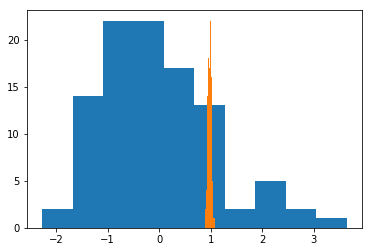

In [71]:
plt.hist(np.array(enkf.h_ens)[0])
plt.hist(np.array(enkf.h_ens)[-1])

(array([ 2.,  2.,  9., 15., 17., 19., 15., 10.,  9.,  2.]),
 array([ 2.6730903 ,  3.61604629,  4.55900228,  5.50195828,  6.44491427,
         7.38787026,  8.33082625,  9.27378225, 10.21673824, 11.15969423,
        12.10265023]),
 <a list of 10 Patch objects>)

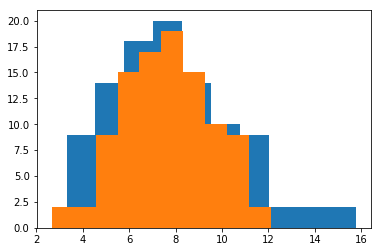

In [72]:
plt.hist(np.array(enkf.c_ens)[0])
plt.hist(np.array(enkf.c_ens)[-1])

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1., 50., 42.,  5.]),
 array([-5.79439451, -3.92923425, -2.06407398, -0.19891372,  1.66624655,
         3.53140682,  5.39656708,  7.26172735,  9.12688761, 10.99204788,
        12.85720814]),
 <a list of 10 Patch objects>)

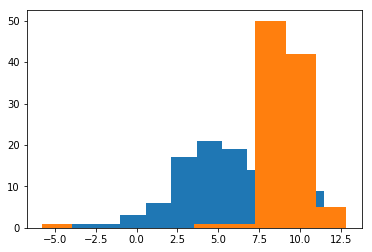

In [73]:
plt.hist(np.array(enkf.b_ens)[0])
plt.hist(np.array(enkf.b_ens)[-1])